<a href="https://colab.research.google.com/github/naperpickleball/googlecolabjuly7/blob/main/july7thcolabtry1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This block installs all the tools we need.
# You only need to run this once!
!pip install ultralytics opencv-python pyttsx3 numpy gTTS

print("✅ All our tools are installed and ready!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 756.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


Video loaded successfully! Let's watch it frame by frame.
Here is the first frame of the video:


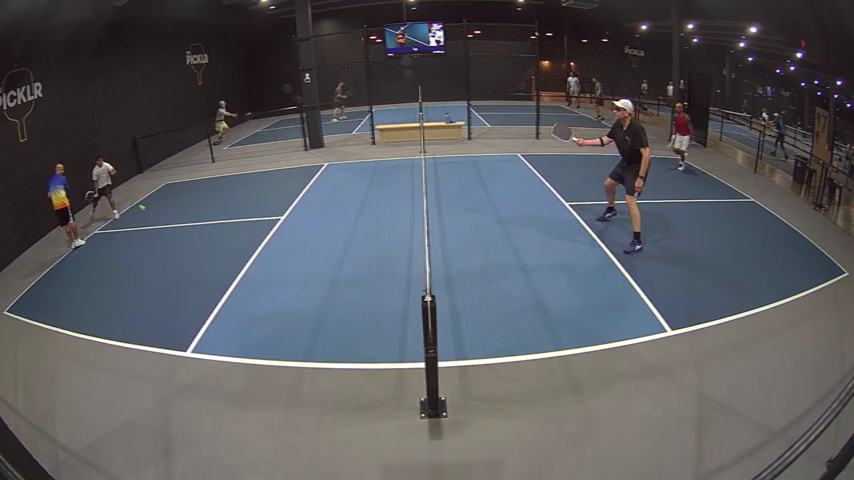

In [2]:
# This block helps us see the video.
import cv2
from google.colab.patches import cv2_imshow # Special for showing images in Colab

# The name of our video file we just uploaded
video_path = 'pickleball_game.mp4'

# This is like pressing 'Play' on a VCR.
cap = cv2.VideoCapture(video_path)

# Check if the video opened correctly
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully! Let's watch it frame by frame.")

# Let's just look at the very first frame to make sure it works.
ret, frame = cap.read() # 'ret' is true if it worked, 'frame' is the picture

if ret:
    print("Here is the first frame of the video:")
    # We resize it to make it fit on the screen nicely
    frame = cv2.resize(frame, (854, 480))
    cv2_imshow(frame) # This displays the picture in our notebook
else:
    print("Couldn't read the first frame.")

# It's good practice to release the video when you're done.
cap.release()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 16.8MB/s]



0: 384x640 9 persons, 383.6ms
Speed: 12.4ms preprocess, 383.6ms inference, 40.4ms postprocess per image at shape (1, 3, 384, 640)
Look! The detective found stuff and drew boxes around it!


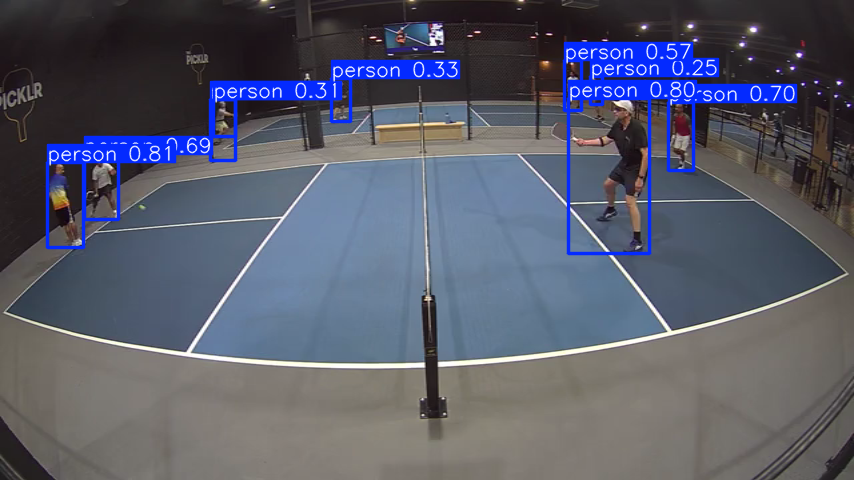

In [3]:
# This block uses our YOLO detective to find things.
from ultralytics import YOLO

# Load the detective. 'yolov8n.pt' is a small and fast version of YOLO.
# It's already trained to find common objects like people.
model = YOLO('yolov8n.pt')

# Let's use the same frame from before
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if ret:
    frame = cv2.resize(frame, (854, 480))

    # Ask the detective to find things in our picture
    results = model(frame)

    # The detective gives us a report. Let's draw on the picture based on the report.
    annotated_frame = results[0].plot() # .plot() is a shortcut to draw the boxes!

    print("Look! The detective found stuff and drew boxes around it!")
    cv2_imshow(annotated_frame)

cap.release()

We've marked the Kitchen Zone!


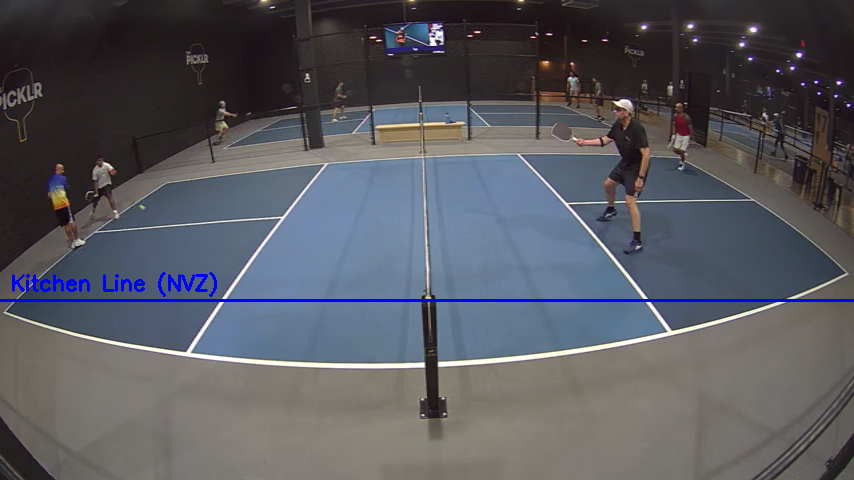

In [4]:
import numpy as np

# Let's re-use our frame from before.
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
frame = cv2.resize(frame, (854, 480))
cap.release()

# === The "Coloring Book" Part ===
# Let's pretend we know where the kitchen line is.
# We measure the "address" of the line on our screen (these are pixel coordinates).
# Let's say the line goes from left to right.
# (x1, y1) is the left point of the line.
# (x2, y2) is the right point of the line.
# You can find these numbers by opening the image in Paint and hovering your mouse!
# For our example, let's guess some coordinates.
KITCHEN_LINE_Y_COORDINATE = 300 # We'll assume it's a flat horizontal line for simplicity

# Let's draw this line on our frame to see it.
# The color is (Blue, Green, Red) and the thickness is 2.
cv2.line(frame, (0, KITCHEN_LINE_Y_COORDINATE), (854, KITCHEN_LINE_Y_COORDINATE), (255, 0, 0), 2)

# Let's also add some text.
cv2.putText(frame, "Kitchen Line (NVZ)", (10, KITCHEN_LINE_Y_COORDINATE - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)


print("We've marked the Kitchen Zone!")
cv2_imshow(frame)

All tools imported.
YOLO detective is on the case.
Starting to watch the video...
VOICE SYSTEM: Saying 'Careful, you are in the kitchen!'


Processing complete! Here is the final analyzed frame:


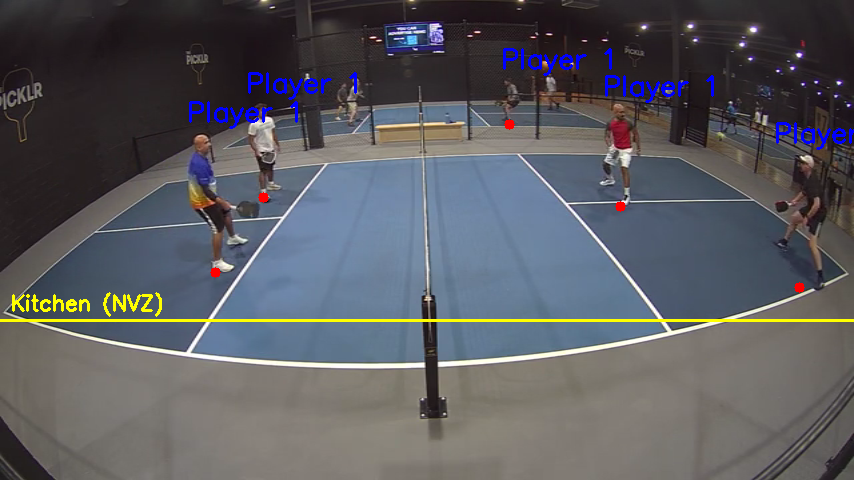

All done. Great job!


In [5]:
# ===================================================================
# == SMART PICKLEBALL ASSISTANT - PROTOTYPE V1                     ==
# ===================================================================

# --- 1. IMPORT OUR TOOLS ---
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from gtts import gTTS
from IPython.display import Audio, display
import threading
import time

print("All tools imported.")

# --- 2. SETUP OUR ASSISTANT'S BRAIN ---

# Load the YOLO detective. It knows how to find people and sports balls.
model = YOLO('yolov8n.pt')
print("YOLO detective is on the case.")

# This is the "address" on the screen for our Non-Volley Zone line.
# You will need to change this number based on your video's camera angle.
KITCHEN_LINE_Y = 320

# This is a safety margin. How close is "too close"? (in pixels)
SAFETY_BUFFER = 10

# This is a flag to prevent the voice from yelling constantly.
alert_has_been_spoken = False

# --- 3. CREATE THE VOICE ALERT FUNCTION ---
# This function will run in the background so it doesn't freeze our video.
def speak_alert(message):
    global alert_has_been_spoken
    print(f"VOICE SYSTEM: Saying '{message}'")
    try:
        tts = gTTS(text=message, lang='en')
        tts.save("alert.mp3")
        display(Audio("alert.mp3", autoplay=True))
    except Exception as e:
        print(f"Could not generate voice: {e}")

    # Wait a few seconds before we can speak again
    time.sleep(5)
    alert_has_been_spoken = False

# --- 4. THE MAIN VIDEO PROCESSING LOOP ---
video_path = 'pickleball_game.mp4' # Make sure you uploaded this file!
cap = cv2.VideoCapture(video_path)

print("Starting to watch the video...")

# We'll just process the first 150 frames for this demo to keep it fast.
for i in range(150):
    ret, frame = cap.read()
    if not ret:
        print("End of video reached.")
        break

    # Resize the frame to a standard size
    frame = cv2.resize(frame, (854, 480))

    # This part draws the yellow kitchen line on the video
    cv2.line(frame, (0, KITCHEN_LINE_Y), (854, KITCHEN_LINE_Y), (0, 255, 255), 2)
    cv2.putText(frame, "Kitchen (NVZ)", (10, KITCHEN_LINE_Y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)

    # Give the current frame to our YOLO detective
    results = model(frame, verbose=False) # verbose=False makes it less chatty

    # Check the detective's findings
    for result in results:
        for box in result.boxes:
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])

            # We only care about 'person' (class_id 0)
            if class_id == 0 and confidence > 0.5:
                # Get the box coordinates
                x1, y1, x2, y2 = [int(coord) for coord in box.xyxy[0]]

                # We assume the person closest to the bottom of the screen is our player
                # A better way would be color tracking, but this is a good start.

                # This part finds the player's feet
                player_feet_y = y2
                player_feet_x = (x1 + x2) // 2

                # Draw a red dot at the player's feet to see if we're tracking correctly
                cv2.circle(frame, (player_feet_x, player_feet_y), 5, (0, 0, 255), -1)
                cv2.putText(frame, "Player 1", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)

                # This is the rule-checking magic!
                # "This part watches the kitchen line"
                if player_feet_y > (KITCHEN_LINE_Y - SAFETY_BUFFER):
                    cv2.putText(frame, "FOOT FAULT!", (player_feet_x - 50, player_feet_y - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

                    # If we haven't already spoken the alert, speak it now
                    if not alert_has_been_spoken:
                        alert_has_been_spoken = True
                        # Run the voice in a separate thread so the video doesn't freeze
                        alert_thread = threading.Thread(target=speak_alert, args=("Careful, you are in the kitchen!",))
                        alert_thread.start()

    # When the loop is done, we'll just show the very last frame we processed.
    # To make a video, you would save each frame to a new video file.

print("Processing complete! Here is the final analyzed frame:")
cv2_imshow(frame)

# Clean up
cap.release()
print("All done. Great job!")